In [1]:
import gzip
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

data = pd.read_csv('optical+recognition+of+handwritten+digits/optdigits-orig.cv/optdigits-orig.cv', header=None, skiprows=21, delim_whitespace=True)

print(data.head())

                                  0
0  00000000000001100111100000000000
1  00000000000111111111111111000000
2  00000000011111111111111111110000
3  00000000011111111111111111110000
4  00000000011111111101000001100000


C:\Users\qadee\AppData\Local\Temp\ipykernel_14020\3254052412.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('optical+recognition+of+handwritten+digits/optdigits-orig.cv/optdigits-orig.cv', header=None, skiprows=21, delim_whitespace=True)


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize an SVM classifier
classifier = svm.SVC(gamma=0.001, kernel='rbf')

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the test set
predicted = classifier.predict(X_test)

# Evaluate the model
print("Classification report:\n")
print(classification_report(y_test, predicted))

Data loaded successfully!
                                  0
0  00000000000001100111100000000000
1  00000000000111111111111111000000
2  00000000011111111111111111110000
3  00000000011111111111111111110000
4  00000000011111111101000001100000
Total columns: 1
Features preview: Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Labels preview: 0    00000000000001100111100000000000
1    00000000000111111111111111000000
2    00000000011111111111111111110000
3    00000000011111111111111111110000
4    00000000011111111101000001100000
Name: 0, dtype: object
Train/Test sizes: (21852, 0) (9366, 0)


ValueError: at least one array or dtype is required

In [6]:
def load_data(filepath, skip_rows=21):
    with open(filepath, 'r') as file:
        lines = file.readlines()[skip_rows:]
    labels = []
    features = []
    for line in lines:
        line = line.strip() 
        if line:
            try:
                labels.append(int(line[0]))
                features.append([int(char) for char in line[1:]]) 
            except ValueError:
                print("Error processing line:", line)
                continue
    return pd.DataFrame(features), pd.Series(labels)

# Load the data
X, y = load_data('optical+recognition+of+handwritten+digits/optdigits-orig.cv/optdigits-orig.cv')

print("Data loaded successfully!")
print("Features preview:")
print(X.head())
print("Labels preview:")
print(y.head())

Data loaded successfully!
Features preview:
    0    1    2    3    4    5    6    7    8    9   ...   21   22   23   24  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0  1.0   

    25   26   27   28   29   30  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  1.0  1.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  0.0  0.0  0.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 31 columns]
Labels preview:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Assuming X and y are already defined and loaded as shown previously
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handling NaN values by imputing
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert features and labels to appropriate types after imputation
X_train = pd.DataFrame(X_train).astype(float)
y_train = pd.Series(y_train).astype(int)

# Initialize the SVM classifier
classifier = svm.SVC(gamma=0.001, kernel='rbf')
classifier.fit(X_train, y_train)  # Train the classifier

# Predict the test set and evaluate the model
predicted = classifier.predict(X_test)
print("Classification report:\n", classification_report(y_test, predicted))

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      9126
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        23

    accuracy                           0.97      9366
   macro avg       0.10      0.10      0.10      9366
weighted avg       0.95      0.97      0.96      9366



C:\Users\qadee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\qadee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\qadee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

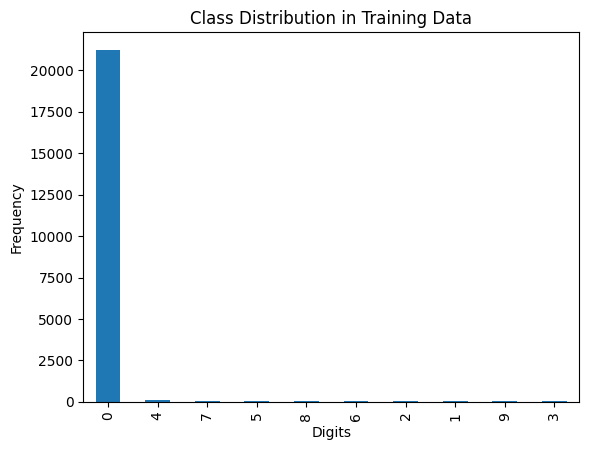

In [9]:
import matplotlib.pyplot as plt

# Check class distribution in the training set
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Data')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grid to test
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 0.001, 0.01],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Different types of kernels
}

# Initialize the classifier
classifier = svm.SVC()

# Set up the grid search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best estimator to predict the test set
best_classifier = grid_search.best_estimator_
predicted = best_classifier.predict(X_test)
print("Classification report:\n", classification_report(y_test, predicted))